# Submission1, Exercises after Lecture 2

This notebook contains the submission exercises with instructions and explanations. You have to submit this notebook as a part of Submission 1.

Implement the functions mentioned above from scratch, using only mathematical operations (+, -, /, *)  and numpy functions such as np.exp, np.matmul, np.log, np.size, np.resize, np.mean, np.sum, np.maximum, np.minimum, np/max, np.min, np.square, np.sqrt, np.clip, np.clamp, np.array, np.arange, np.ones, np.zeros, np.transpose, np.linalg.norm, and similar functions from numpy library.

**You ARE NOT ALLOWED to USE torch, sklearn or any other libraries or toolboxes that automatically solve the main tasks of the assignment, such as (but not limited to) nn.MSELoss, nn.Sigmoid, sklearn.metrics.mean_squared_error, etc.**

This notebook was developed at the [Idiap Research Institute](https://www.idiap.ch) by [Alina Elena Baia](mailto:alina.baia.idiap.ch>), [Darya Baranouskaya](mailto:darya.baranouskaya.idiap.ch) and [Olena Hrynenko](mailto:olena.hrynenko.idiap.ch). Any reproduction or distribution of this document, in whole or in part, is prohibited unless permission is granted by the authors.
<!--
SPDX-FileCopyrightText: Copyright (c) 2019-2025 Idiap Research Institute <contact@idiap.ch>
SPDX-FileContributor: Alina Elena Baia <alina.baia.idiap.ch>
SPDX-FileContributor: Darya Baranouskaya <darya.baranouskaya.idiap.ch>
SPDX-FileContributor: Olena Hrynenko <olena.hrynenko.idiap.ch>
-->

## Activation functions



##### 1.2.1 Implement Sigmoid [1 point] and Leaky ReLU [1 point] functions and their first derivatives.

In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def visualise_activation_and_deriv(activation, deriv, slope = None):
    x = np.linspace(-10, 10, num=200)

    if (slope is not None):
        y = [activation(x_i, slope) for x_i in x]
        y_deriv = [deriv(x_i, slope) for x_i in x]

    else:
        y = [activation(x_i) for x_i in x]
        y_deriv = [deriv(x_i) for x_i in x]

    plt.plot(x, y, label = "Activation function")
    plt.plot(x, y_deriv, label = "Derivative of activation function")
    plt.legend() 
    plt.show()

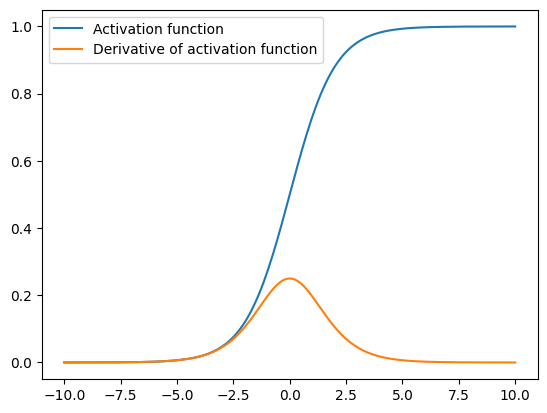

In [12]:
## TODO sigmoid

def sigmoid(x):
    # y = ...
    # YOUR CODE HERE
    # Function: y = 1 / (1 + e^(-x))
    y = 1.0 / (1.0 + np.exp(-x))
    return y

def sigmoid_deriv(x):
    # y = ...
    # YOUR CODE HERE
    # Derivative: sigmod'(x)= sigmoid(x) * (1 - sigmoid(x))
    y = sigmoid(x) * (1 - sigmoid(x))
    return y

visualise_activation_and_deriv(sigmoid, sigmoid_deriv)

In [13]:
assert (sigmoid(15) + 1e-8 >= 0.999999694097773) and (sigmoid(15) - 1e-8 <= 0.999999694097773)
assert (sigmoid(-3) + 1e-8 >= 0.04742587317756678) and (sigmoid(-3) - 1e-8 <= 0.04742587317756678)
assert (sigmoid_deriv(15) + 1e-8 >= 3.0590213334945224e-07) and (sigmoid_deriv(15) - 1e-8 <= 3.0590213334945224e-07)
assert (sigmoid_deriv(-3) + 1e-8 >= 0.04517665973091213) and (sigmoid_deriv(-3) - 1e-8 <= 0.04517665973091213)


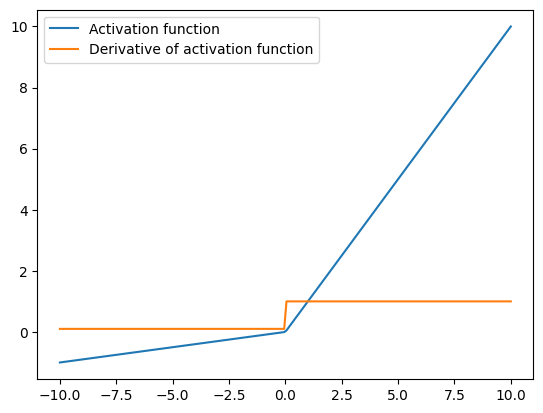

In [14]:
## TODO Leaky ReLU
def leaky_relu(x, slope=0.01):
    # y = ...
    # YOUR CODE HERE
    # Function: y = max(x, x * slope)
    y = np.maximum(x, x * slope)
    return y

def leaky_relu_deriv(x, slope):
    # y = ...
    # YOUR CODE HERE
    # Derivative: y = 1 if x > 0 else slope
    y = np.where(x > 0, 1, slope)
    return y


visualise_activation_and_deriv(leaky_relu, leaky_relu_deriv, slope = 0.1)

In [15]:
assert leaky_relu(15, slope=0.1) == 15
assert leaky_relu(-1, slope=0.1) == -0.1
assert leaky_relu_deriv(1, slope=0.1) == 1
assert leaky_relu_deriv(-1, slope=0.1) == 0.1


## Loss functions

##### 1.2.2 Implement Mean Squared Error (L2-metric) [1 point] and Contrastive Loss [2 points].


**Mean Squared Error Loss**

You should implement MSE loss using numpy.

MSE loss is used in regression tasks to measure the average squared difference between the predicted and target values.

----------------

$input$ - numpy array of size (*), where * means any number of dimensions

$target$ - numpy array of the same size as input

$n$ - number of elements in input in total

Implement the MSE loss function $L(input, target)$ according to the formula.
$$L(input, target) = \frac{1}{n}\sum_{i=0}^{n - 1}(input_i - target_i)^2$$

The output of a function should be a single float value.

In [16]:
# TODO MSE Loss function that takes as input vector of size
def mse_loss(input, target):
    '''
    Parameters:
    input: N-dimensional numpy array
    target: N-dimensional numpy array, the same size as input

    Returns:
    loss : float. MSE loss value.
    '''
    assert input.shape == target.shape
    # loss = ...
    # YOUR CODE HERE
    # MSE Loss: loss = 1/N * sum((input - target)^2)
    n = input.size
    loss = np.sum((input - target) ** 2) / n
    return loss

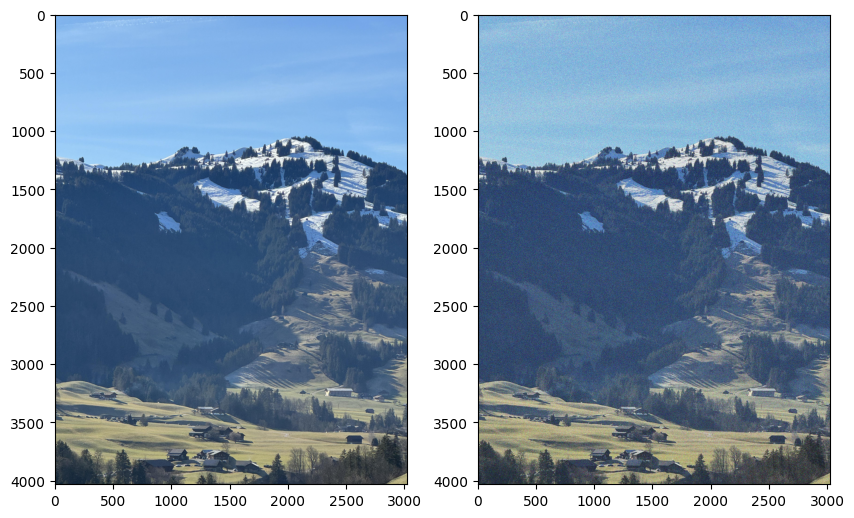

In [18]:
from PIL import Image
# loading two images: with and without added noise
image = np.array(Image.open('lab2_image.jpg'))
image_with_noise = np.array(Image.open('lab2_image_with_noise.jpg'))
f, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(image)
ax[1].imshow(image_with_noise)
plt.show()
image = np.float32(image) # for the loss calculation and further processing we need to convert the image to float32
image_with_noise = np.float32(image_with_noise)


In [19]:
image = Image.open('lab2_image.jpg') 
image_with_noise = Image.open('lab2_image_with_noise.jpg')

In [20]:
#this code crops the above images on patches
import cv2
image = np.array(Image.open('lab2_image.jpg'), dtype=np.float32) / 255
image_with_noise = np.array(Image.open('lab2_image_with_noise.jpg'), dtype=np.float32) / 255

patch_size = 64
similar_pairs_x_coordinates = [2000, 1130]
similar_pairs_y_coordinates = [1020, 3550]

different_pairs_x_coordinate = [2500, 70]
different_pairs_y_coordinate = [3000, 1100]

def crop_patches(image, x_coordinates, y_coordinates, patch_size):
    patches = []
    for x, y in zip(x_coordinates, y_coordinates):
        patch = image[y:y+patch_size, x:x+patch_size]
        patches.append(patch)
    return patches

'''
patches_image_img contains patches cropped from original image
patches_image_with_noise_img contains patches cropped from noisy image but from the same places as patches_image_img
patches_image_with_noise_non_matching_img contains patches cropped from noisy image randomly,
        the location of the patch doesn't match the location of patches_image_img and patches_image_with_noise_img
'''
patches_image_img = crop_patches(image, similar_pairs_x_coordinates, similar_pairs_y_coordinates, patch_size)
patches_image_with_noise_img = crop_patches(image_with_noise, similar_pairs_x_coordinates, similar_pairs_y_coordinates,  patch_size)
patches_image_with_noise_non_matching_img = crop_patches(image_with_noise, different_pairs_x_coordinate, different_pairs_y_coordinate, patch_size)

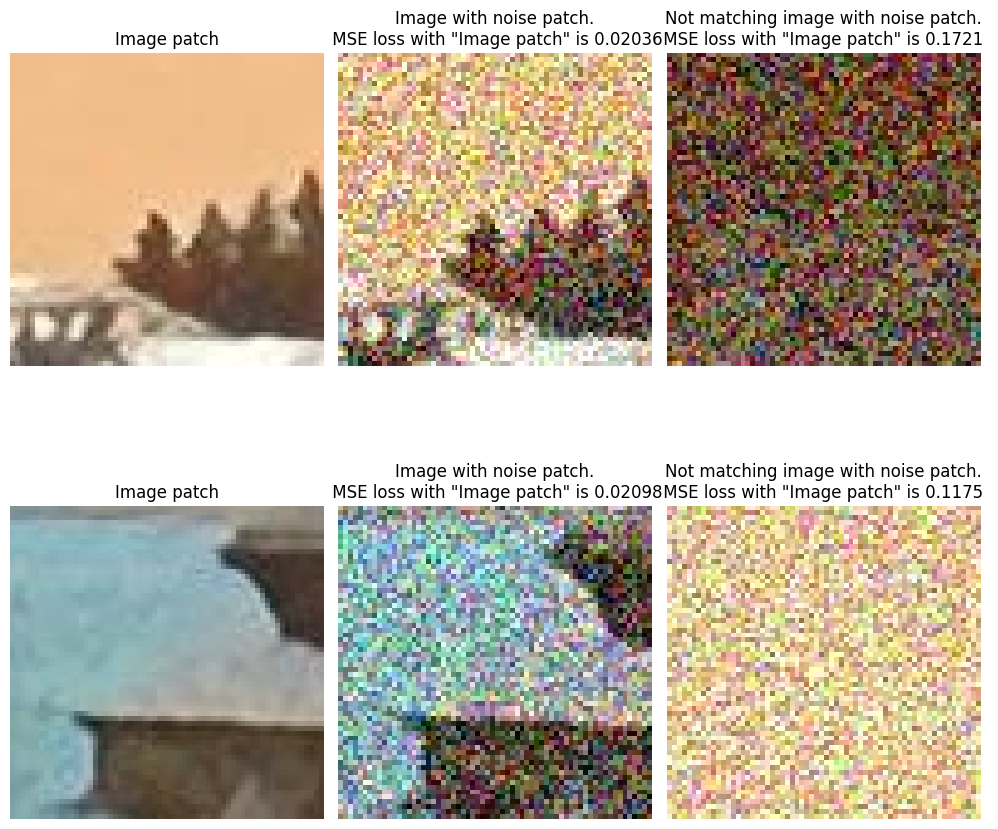

In [21]:
# Plot the image and noisy image patches and the MSE loss (l2 distance) between them.
# If MSE is implemented correctly the loss between "Image patch" and "Image with noise patch"
# should be smaller than the loss between "Image patch" and "Not matching image with noise patch"

num_patches = len(similar_pairs_x_coordinates)

fig, axes = plt.subplots(num_patches, 3, figsize=(10, 10))

for i in range(num_patches):
    axes[i, 0].imshow(cv2.cvtColor(patches_image_img[i], cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title('Image patch')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(cv2.cvtColor(patches_image_with_noise_img[i], cv2.COLOR_BGR2RGB))
    axes[i, 1].set_title(f'Image with noise patch.\n MSE loss with "Image patch" is {mse_loss(patches_image_with_noise_img[i], patches_image_img[i]):.4}')
    axes[i, 1].axis('off')

    axes[i, 2].imshow(cv2.cvtColor(patches_image_with_noise_non_matching_img[i], cv2.COLOR_BGR2RGB))
    axes[i, 2].set_title(f'Not matching image with noise patch.\n MSE loss with "Image patch" is {mse_loss(patches_image_with_noise_non_matching_img[i], patches_image_img[i]):.4} ')
    axes[i, 2].axis('off')


plt.tight_layout()
plt.show()

In [23]:
answ = mse_loss(image_with_noise, image)
assert (answ + 1e-5 >= 0.02070585)  and (answ - 1e-5 <= 0.02070585)

answ = mse_loss(np.array(patches_image_with_noise_img), np.array(patches_image_img))
assert (answ + 1e-5 >= 0.020671941)  and (answ - 1e-5 <= 0.020671941)

answ = mse_loss(np.array(patches_image_with_noise_non_matching_img), np.array(patches_image_img))
assert (answ + 1e-5 >= 0.020671941)  and (answ - 1e-5 <= 0.14480184)

y = np.array([[17, 19], [18, 23]])
y_pred = np.array([[18.1, 19.3], [18.3, 17]])
assert mse_loss(y_pred, y) == 9.3475

y = np.array([[-78.3, 87, 0.2]])
y_pred = np.array([[-77.7, -1, 1.17]])
assert (mse_loss(y_pred, y) + 1e-5 >= 2581.7669666666666)  and (mse_loss(y_pred, y) - 1e-5 <= 2581.7669666666666)

## Contrastive loss
 You should implement Contrastive loss using numpy. Contrastive loss is a commonly used loss function in siamese neural networks for learning embeddings. The idea of the loss is to minimize the distance between similar pairs while maximizing the distance between dissimilar pairs in the embedding space.

----------------

$N$ - number of pairs(batch size)

$d$ - feature size (size of embedding)

$input1$ - 2D numpy array of size $(N, d)$

$input2$ - 2D numpy array of size $(N, d)$

$target$ - an array of size $(N)$, with binary values representing if corresponding samples from $input1$ and $input2$ belong to the same class: $target_i$ is equal to 1, if $input1_i$ and $input2_i$ belong to the same class, and 0 otherwise.

Implement the Contrastive Loss function $L(input1, input2, target, margin)$ according to formula.
$$L(input1, input2, target, margin) = \frac{1}{N}\sum_{i=0}^{N - 1}(target_i * distance(input1_i, input2_i)^2 + (1 - target_i) * (max(0, margin - distance(input1_i, input2_i)))^2)$$, where $$distance(input1_i, input2_i) = ||input1_i - input2_i||_2$$

The output of a function should be a single float value.

In [24]:
## TODO Contrastive loss

def contrastive_loss(input1, input2, target, margin):
    """
    Parameters:
      input1 and input2: two numpy arrays containing input embeddings of size (batch_size, embedding_dim) each,
    where batch_size is the number of pairs and embedding_dim is the dimensionality of the embeddings.
      target: numpy array containing binary target labels of size (batch_size), where 1 indicates similar pairs, and 0 indicates dissimilar pairs.
    target[i] indicates if input1[i] is similar to input2[i]
    margin: float value representing the lower bound distance between samples of different classes.

    Returns:
    loss : float. Contrastive loss value.
    """
    # YOUR CODE HERE
    # 1) compute the distance first
    distances = np.linalg.norm(input1 - input2, axis=1) # shape=(N,)
    # 2) compute loss for two parts seperately
    pos_pair_loss = target * (distances ** 2)
    neg_pair_loss = (1 - target) * np.square(np.maximum(0, margin - distances))

    # 3) take average for N samples
    loss = np.mean(pos_pair_loss + neg_pair_loss)
    return loss

In [ ]:
input1 = np.array([[0.3, 1, 0.7], [0.1, 0.5, 0.4]])
input2 = np.array([[1, 7, 0.2], [1, 4, 0.1]])
target = np.array([0, 1])

margin = 10
answ = contrastive_loss(input1, input2, target, margin=10)
assert (answ + 1e-5 >= 14.331470157)  and (answ - 1e-5 <= 14.331470157)

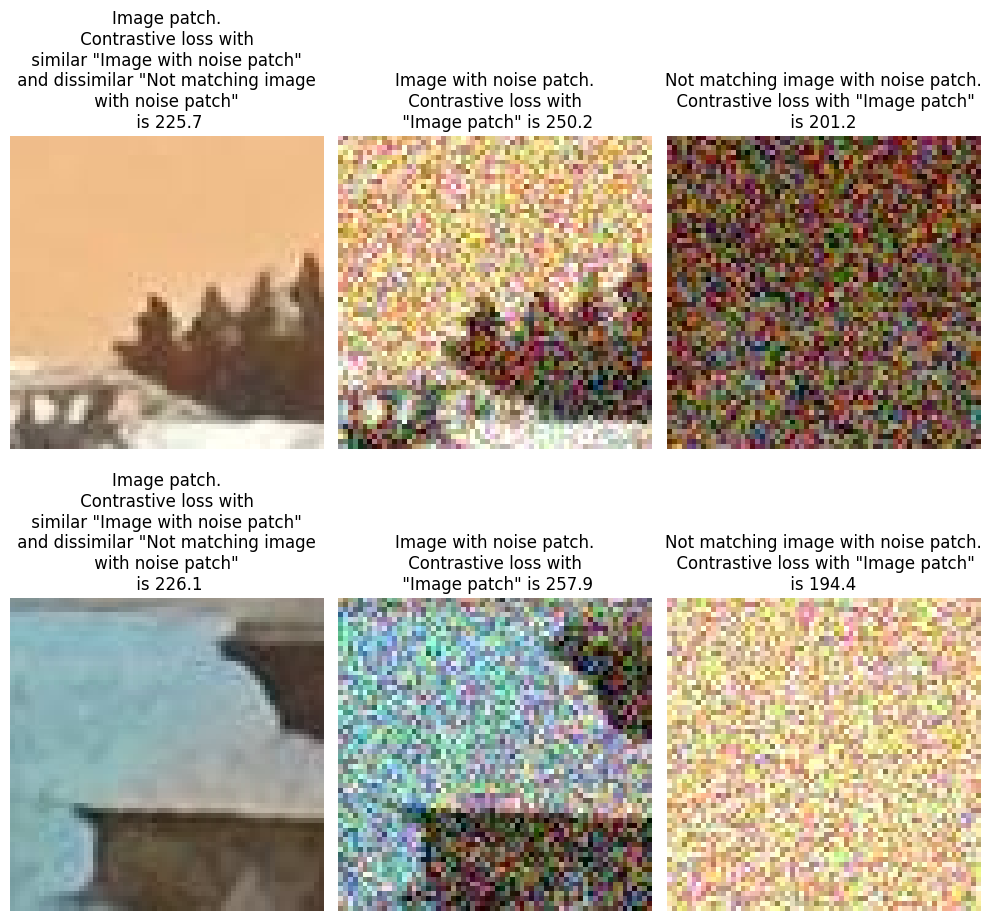

In [26]:
#Flatten patches of images seen before.
#Flattened patches can be interpreted as embeddings of the patches
patches_flatten_shape = (len(patches_image_img), patch_size * patch_size * 3)

patches_image = np.array(patches_image_img)
patches_image = np.resize(patches_image, patches_flatten_shape)

patches_image_with_noise = np.array(patches_image_with_noise_img)
patches_image_with_noise = np.resize(patches_image_with_noise, patches_flatten_shape)

patches_image_with_noise_non_matching = np.array(patches_image_with_noise_non_matching_img)
patches_image_with_noise_non_matching = np.resize(patches_image_with_noise_non_matching, patches_flatten_shape)


# Plot the image and noisy image patches and the Contrastive loss between them.
# We consider "Image patch" and "Image with noise patch" to be similar, while "Image patch" and "Not matching image with noise patch" are dissimilar.
# If implemented correctly the resulting loss values should be around [[225.7, 250.2, 201.2], [226.1, 257.9, 194.4]]

num_patches = len(similar_pairs_x_coordinates)

fig, axes = plt.subplots(num_patches, 3, figsize=(10, 10))

margin = 30
for i in range(num_patches):
    axes[i, 0].imshow(cv2.cvtColor(patches_image_img[i], cv2.COLOR_BGR2RGB))
    contr = contrastive_loss(np.concatenate([patches_image[i:i+1], patches_image[i:i+1]], axis=0),
                             np.concatenate([patches_image_with_noise[i:i+1], patches_image_with_noise[i:i+1]], axis=0),
                             target = np.array([1, 0]), margin=margin)
    axes[i, 0].set_title(f'Image patch.\n Contrastive loss with \n similar "Image with noise patch" \n and dissimilar "Not matching image \n with noise patch" \n is {contr:.4}')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(cv2.cvtColor(patches_image_with_noise_img[i], cv2.COLOR_BGR2RGB))
    contr = contrastive_loss(patches_image[i:i+1], patches_image_with_noise[i:i+1], target = np.array([1]), margin=margin)
    axes[i, 1].set_title(f'Image with noise patch.\n Contrastive loss with \n "Image patch" is {contr:.4}')
    axes[i, 1].axis('off')

    axes[i, 2].imshow(cv2.cvtColor(patches_image_with_noise_non_matching_img[i], cv2.COLOR_BGR2RGB))
    contr = contrastive_loss(patches_image[i:i+1], patches_image_with_noise[i:i+1], target = np.array([0]), margin=margin)
    axes[i, 2].set_title(f'Not matching image with noise patch.\n  Contrastive loss with "Image patch" \n is {contr:.4} ')
    axes[i, 2].axis('off')


plt.tight_layout()
plt.show()